In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import shap

ModuleNotFoundError: No module named 'shap'

In [7]:
# function for plotting shap values
def shap_beeswarm(shap_values, X_test):
    shap.initjs()
    shap.summary_plot(shap_values[0], X_test.drop(['cell_id', 'cell_type'], axis=1), feature_names=X_test.drop(['cell_id', 'cell_type'], axis=1).columns)

def shap_bar_plot(shap_values, X_test):
    shap.initjs()
    shap.summary_plot(list(shap_values), plot_type = 'bar', feature_names = X_test.drop(['cell_id', 'cell_type'], axis=1).columns)
    # 140 classes = each regression output

# TODO remove .drop()

shap_values = np.load('shap_values_16_50_samples.npy', allow_pickle=True).astype(float)
# xtest = read('X_test_shap_16.pkl')  # .h5ad TODO
# shap_beeswarm(shap_values, xtest)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


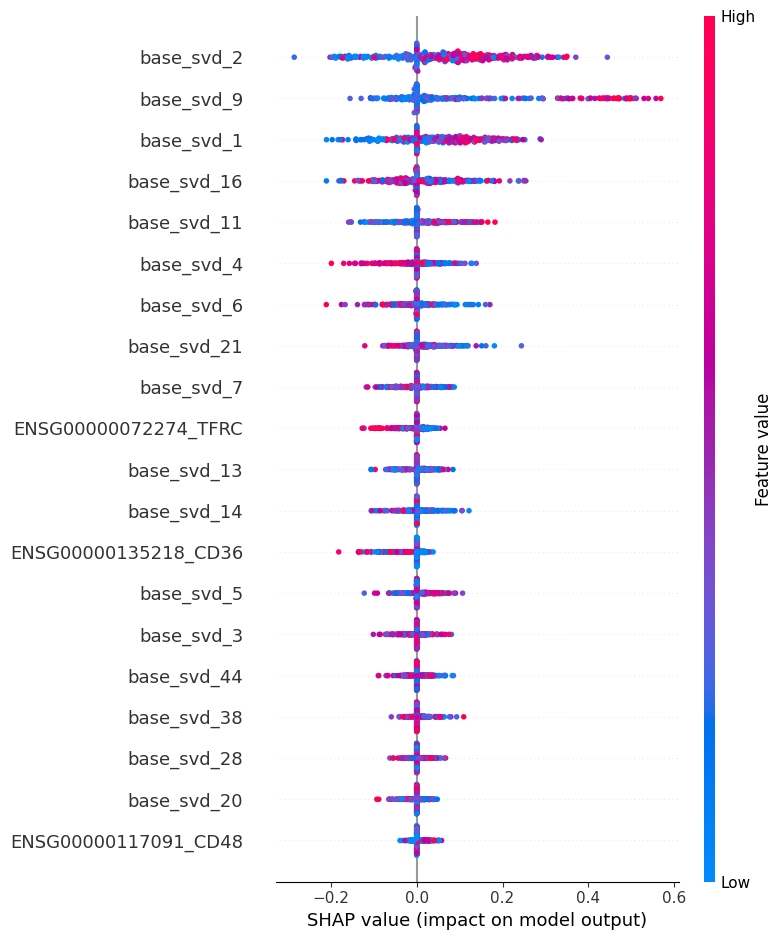

In [ ]:
# shap.initjs()
# shap.summary_plot(shap_values[0], xtest.drop(['cell_id', 'cell_type'], axis=1), feature_names=xtest.drop(['cell_id', 'cell_type'], axis=1).columns)

# goal: get this plot as SHAP / features instead of SHAP / SVD components + features


Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


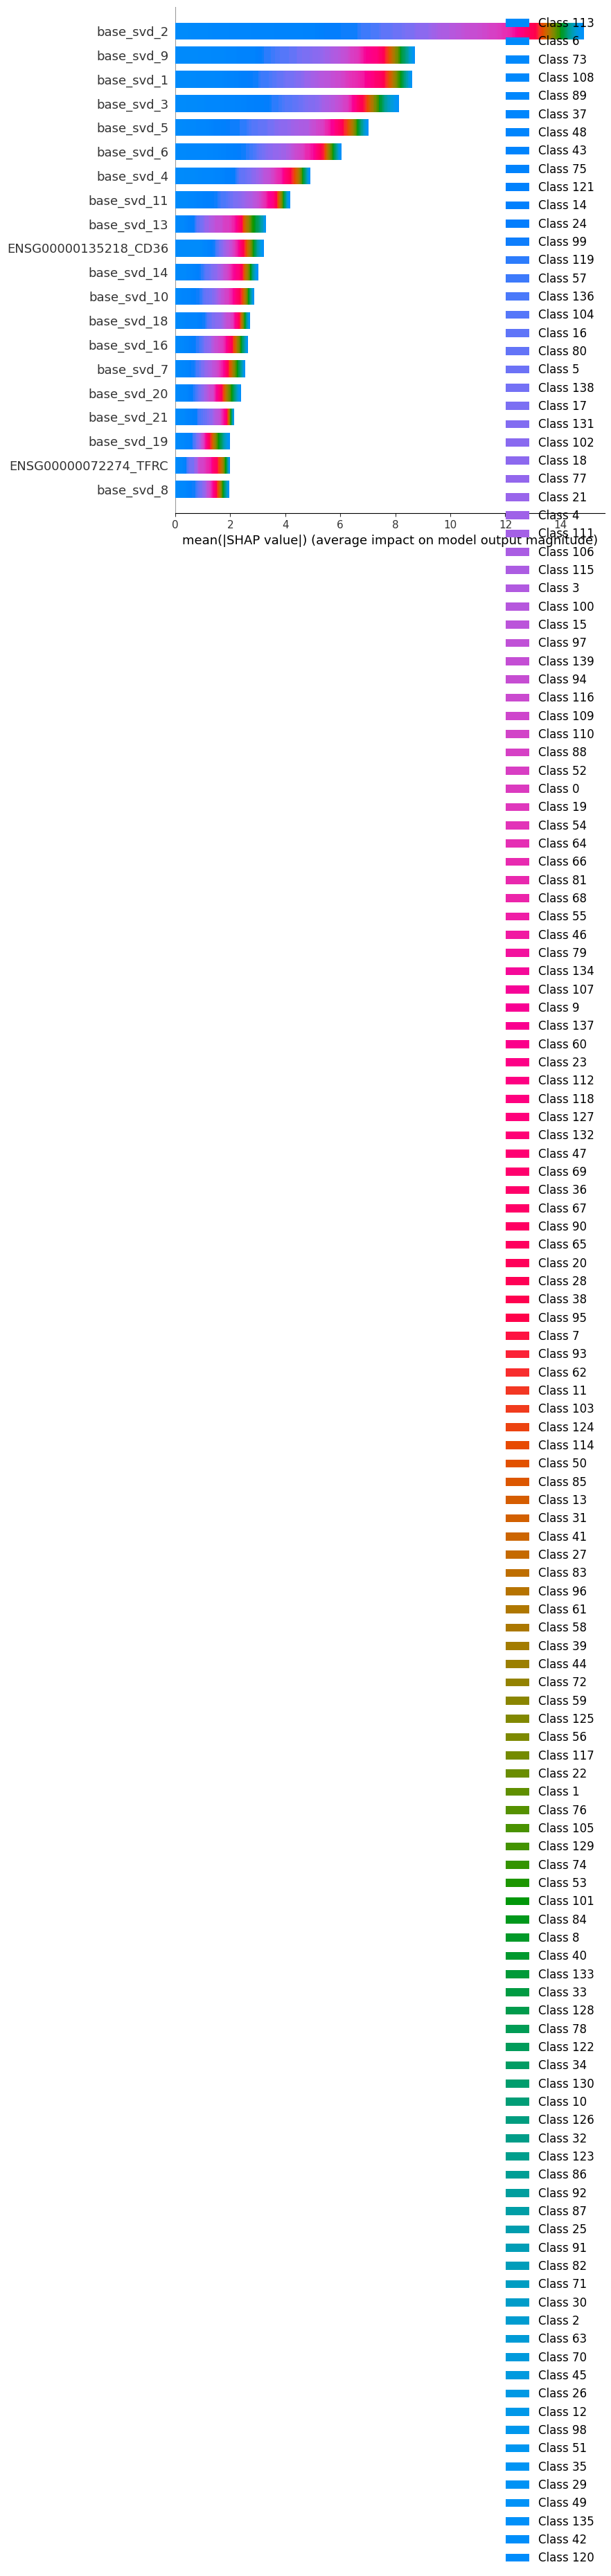

In [ ]:
# shap.initjs()
# shap.summary_plot(list(shap_values), plot_type = 'bar', feature_names = xtest.drop(['cell_id', 'cell_type'], axis=1).columns)
# # 140 classes = each regression output

shap_bar_plot(shap_values, xtest)

### plot shap values per cell type similar to shap.summary_plot(shap_values[0], xtest)

In [4]:
data = {}
for feature in ['base_svd_2', 'base_svd_9', 'base_svd_1', 'base_svd_16', 'base_svd_11',
       'base_svd_4', 'base_svd_6', 'base_svd_21', 'base_svd_7',
       'ENSG00000072274_TFRC']:
    column_name = 'SHAP ' + feature.split('_')[-1]
    column_values = shap_values[0, :, xtest.columns.get_loc(feature)]
    data[column_name] = column_values

# Add 'Cell Type' column
data['Cell Type'] = xtest['cell_type']

# Create DataFrame
df = pd.DataFrame(data)

# replace hardcoded part below by this TODO

'2'

In [ ]:
# function for plot: plot top 10 features colouring datapoints by cell type
def get_plot_per_cell_type(shap_values, xtest):

    # get top 10 features (see shap beeswarm plot)
    shap_sum = np.abs(shap_values[0]).sum(axis=0)
    top_features_indices = np.argsort(shap_sum)[::-1][:10]  # Get the indices of the top 10 features
    top_feature_names_shap = xtest.drop(['cell_id', 'cell_type'], axis=1).columns[top_features_indices]

    # create df with shap values of top 10 features + cell type
    shap_cell_types = pd.DataFrame({'SHAP svd_2': shap_values[0, :, xtest.columns.get_loc('base_svd_2')],   # TODO try xtest.columns.get_loc('base_svd_2')
                                'SHAP svd_9': shap_values[0, :, 9], 
                                'SHAP svd_1': shap_values[0, :, 1], 
                                'SHAP svd_16': shap_values[0, :, 16], 
                                'SHAP svd_11': shap_values[0, :, 11], 
                                'SHAP svd_4': shap_values[0, :, 4], 
                                'SHAP svd_6': shap_values[0, :, 6], 
                                'SHAP svd_21': shap_values[0, :, 21], 
                                'SHAP svd_7': shap_values[0, :, 7], 
                                'SHAP TFRC': shap_values[0, :, xtest.columns.get_loc('ENSG00000072274_TFRC')+1],  # TODO check +1
                                'Cell Type': xtest['cell_type']})
    
    # code for actual plot:

    # Assign different colors to each class
    colors = {'BP': 'red', 'EryP': 'blue', 'HSC': 'green', 'MasP': 'orange', 'MkP': 'purple', 'MoP': 'yellow', 'NeuP': 'pink'}

    ## legend ##
    legend_fig, legend_ax = plt.subplots(figsize=(2, 2))

    for class_label, color in colors.items():
        legend_ax.scatter([], [], color=color, label=f'Cell type {class_label}')

    legend_ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=len(colors), frameon=False)
    legend_ax.axis('off')
    ## legend ##


    # plot shap values:
    fig, ax = plt.subplots(figsize=(8, 10))

    x_limit = (-0.3, 0.6)  # TODO automize this

    # Remove y-axis ticks and labels
    ax.yaxis.set_visible(False)

    # Iterate over the columns in shap_cell_types to create subplots
    for i, column in enumerate(shap_cell_types.columns[:-1], start=1):

        ax = fig.add_subplot(len(shap_cell_types.columns)-1, 1, i)

        # Set the x-axis limits and label
        ax.set_xlim(x_limit)
        ax.set_xlabel(column)

        ax.yaxis.set_visible(False)

        # Plot the dots for the current column
        for index, row in shap_cell_types.iterrows():
            shap_value = row[column]
            class_label = row['Cell Type']
            color = colors[class_label]
            ax.plot(shap_value, 0, marker='o', color=color)

            
    fig.tight_layout(rect=[0, 0.1, 1, 1]) 
    legend_fig.subplots_adjust(top=0.1, bottom=0.05)

    plt.show()

In [ ]:
# print top 10 features plotted in beeswarm plot below
shap_sum = np.abs(shap_values[0]).sum(axis=0)
top_features_indices = np.argsort(shap_sum)[::-1][:10]  # Get the indices of the top 10 features
top_feature_names_shap = xtest.drop(['cell_id', 'cell_type'], axis=1).columns[top_features_indices]
top_feature_names_shap

Index(['base_svd_2', 'base_svd_9', 'base_svd_1', 'base_svd_16', 'base_svd_11',
       'base_svd_4', 'base_svd_6', 'base_svd_21', 'base_svd_7',
       'ENSG00000072274_TFRC'],
      dtype='object')

In [ ]:
# shap_values that are plotted in beeswarm below
# [0,:,2] == base_svd_2; [0,:,1] == base_svd_1 etc
second_element = shap_values[0, :, 9]
print(second_element[:20])
print(min(second_element))
max(second_element)  # check values match beeswarm plot

[ 0.02402991 -0.03167345  0.26256736 -0.09405039 -0.03421831  0.28434893
  0.23992858  0.35461594  0.02239423  0.25221524  0.12748891  0.05905342
  0.02510483  0.         -0.10785335  0.          0.39916961  0.
  0.04738398 -0.04140208]
-0.15537065745164913


0.5688849630827918

In [ ]:
shap_cell_types = pd.DataFrame({'SHAP svd_2': shap_values[0, :, 2],   # TODO try xtest.columns.get_loc('base_svd_2')
                                'SHAP svd_9': shap_values[0, :, 9], 
                                'SHAP svd_1': shap_values[0, :, 1], 
                                'SHAP svd_16': shap_values[0, :, 16], 
                                'SHAP svd_11': shap_values[0, :, 11], 
                                'SHAP svd_4': shap_values[0, :, 4], 
                                'SHAP svd_6': shap_values[0, :, 6], 
                                'SHAP svd_21': shap_values[0, :, 21], 
                                'SHAP svd_7': shap_values[0, :, 7], 
                                'SHAP TFRC': shap_values[0, :, xtest.columns.get_loc('ENSG00000072274_TFRC')+1],  # TODO check +1
                                'Cell Type': xtest['cell_type']})
print(shap_cell_types.shape)
shap_cell_types.head()

(350, 11)


,SHAP svd_2,SHAP svd_9,SHAP svd_1,SHAP svd_16,SHAP svd_11,SHAP svd_4,SHAP svd_6,SHAP svd_21,SHAP svd_7,SHAP TFRC,Cell Type
0,0.152602,0.024030,0.015471,0.005517,-0.009934,0.078243,-0.013081,0.000000,0.054370,0.004221,BP
1,0.267562,-0.031673,-0.007481,0.037701,0.018402,0.045588,0.012253,0.100048,0.015193,0.000000,BP
2,-0.045403,0.262567,0.191901,0.000000,0.000000,-0.020373,0.000000,0.065520,0.023147,0.005754,BP
3,0.268057,-0.094050,0.019967,0.047309,0.000000,0.067233,0.000000,0.161228,-0.035381,0.000000,BP
4,0.203284,-0.034218,-0.015951,0.049831,-0.009138,0.000000,0.008481,-0.012390,0.034627,0.000000,BP


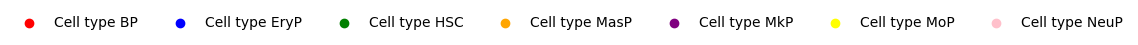

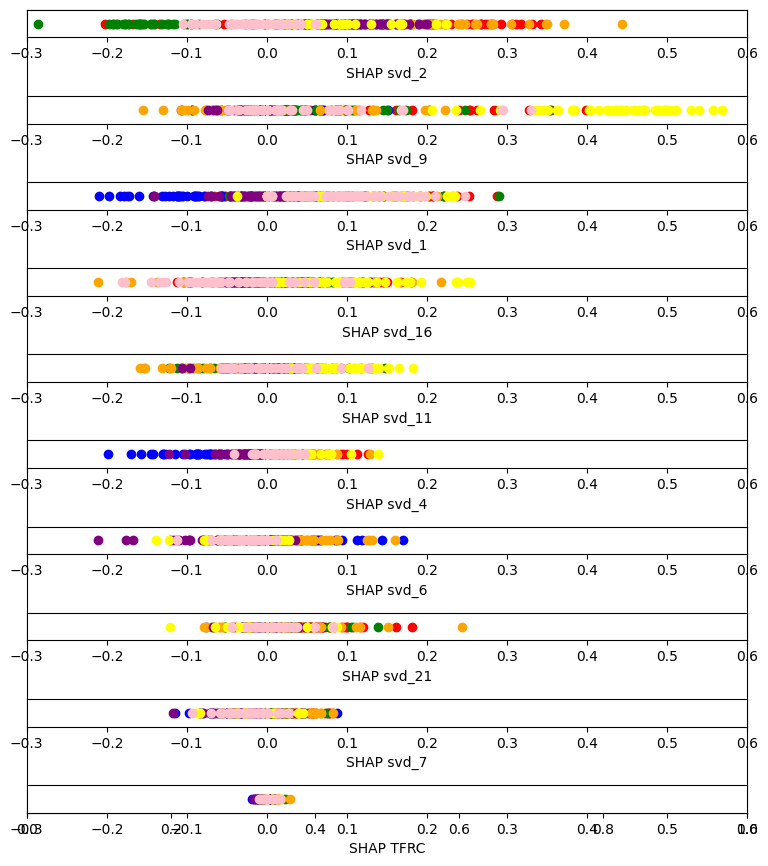

In [ ]:
# Assign different colors to each class
colors = {'BP': 'red', 'EryP': 'blue', 'HSC': 'green', 'MasP': 'orange', 'MkP': 'purple', 'MoP': 'yellow', 'NeuP': 'pink'}

## legend ##
legend_fig, legend_ax = plt.subplots(figsize=(2, 2))

for class_label, color in colors.items():
    legend_ax.scatter([], [], color=color, label=f'Cell type {class_label}')

legend_ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=len(colors), frameon=False)
legend_ax.axis('off')
## legend ##


# plot shap values:
fig, ax = plt.subplots(figsize=(8, 10))

x_limit = (-0.3, 0.6)

# Remove y-axis ticks and labels
ax.yaxis.set_visible(False)

# Iterate over the columns in shap_cell_types to create subplots
for i, column in enumerate(shap_cell_types.columns[:-1], start=1):

    ax = fig.add_subplot(len(shap_cell_types.columns)-1, 1, i)

    # Set the x-axis limits and label
    ax.set_xlim(x_limit)
    ax.set_xlabel(column)

    ax.yaxis.set_visible(False)

    # Plot the dots for the current column
    for index, row in shap_cell_types.iterrows():
        shap_value = row[column]
        class_label = row['Cell Type']
        color = colors[class_label]
        ax.plot(shap_value, 0, marker='o', color=color)

        
fig.tight_layout(rect=[0, 0.1, 1, 1]) 
legend_fig.subplots_adjust(top=0.1, bottom=0.05)

plt.show()